In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("WhatsApp Chat with Ravi Sir.txt",header=None,error_bad_lines=False,encoding='utf8')

In [4]:
# to delet the column 2,3

# Display the column names
print("Column names:")
print(df.columns)

# Display the original DataFrame (first few rows for inspection)
print("Original DataFrame:")
print(df.head())

# Assuming the actual column names are '2' and '3' (as strings)
# If they are integers, you should use integers instead
columns_to_delete = [2, 3]

# Check if columns exist and delete them
columns_to_delete = [col for col in columns_to_delete if col in df.columns]
df.drop(columns=columns_to_delete, inplace=True)
print(df.head())


Column names:
Int64Index([0, 1, 2, 3], dtype='int64')
Original DataFrame:
          0                                                  1  \
0  11/08/22   10:09 am - Messages and calls are end-to-end ...   
1  24/08/22      6:51 pm - udhayamechengineer: <Media omitted>   
2  27/08/22                 2:05 pm - Ravi Sir: Okay noted but   
3  28/08/22                5:37 pm - Ravi Sir: <Media omitted>   
4  01/09/22   9:31 am - udhayamechengineer: Urgent requirem...   

                    2                                                3  
0   not even WhatsApp   can read or listen to them. Tap to learn more.  
1                 NaN                                              NaN  
2                 NaN                                              NaN  
3                 NaN                                              NaN  
4                 NaN                                              NaN  
          0                                                  1
0  11/08/22   10:09 am - Mes

In [5]:
df.columns=['Date','Chat']
Message=df["Chat"].str.split("-",n=1,expand=True)
df["Time"]=Message[0]
Message1=Message[1].str.split(":",n=1,expand=True)
df["Name"]=Message1[0]
df["Chat"]=Message1[1]
df=df[["Date","Time","Name","Chat"]]
df


,Date,Time,Name,Chat
0,11/08/22,10:09 am,Messages and calls are end-to-end encrypted. ...,None
1,24/08/22,6:51 pm,udhayamechengineer,<Media omitted>
2,27/08/22,2:05 pm,Ravi Sir,Okay noted but
3,28/08/22,5:37 pm,Ravi Sir,<Media omitted>
4,01/09/22,9:31 am,udhayamechengineer,Urgent requirement sir
...,...,...,...,...
355,12/12/23,1:14 pm,udhayamechengineer,<Media omitted>
356,12/12/23,1:14 pm,udhayamechengineer,<Media omitted>
357,12/12/23,1:14 pm,udhayamechengineer,For SFD 1A drive pulley
358,14/12/23,11:35 am,udhayamechengineer,<Media omitted>


In [6]:
#to delete the first row for unknown data
df = df.iloc[1:]

# Optionally, reset the index if needed
df.reset_index(drop=True, inplace=True)
df

,Date,Time,Name,Chat
0,24/08/22,6:51 pm,udhayamechengineer,<Media omitted>
1,27/08/22,2:05 pm,Ravi Sir,Okay noted but
2,28/08/22,5:37 pm,Ravi Sir,<Media omitted>
3,01/09/22,9:31 am,udhayamechengineer,Urgent requirement sir
4,02/09/22,8:38 pm,udhayamechengineer,Crane Velu Anna.vcf (file attached)
...,...,...,...,...
354,12/12/23,1:14 pm,udhayamechengineer,<Media omitted>
355,12/12/23,1:14 pm,udhayamechengineer,<Media omitted>
356,12/12/23,1:14 pm,udhayamechengineer,For SFD 1A drive pulley
357,14/12/23,11:35 am,udhayamechengineer,<Media omitted>


In [7]:
#most talkative and less talkative 
#Step 1: Clean up 'Date' and 'Time' columns
df['Date'] = df['Date'].str.strip()
df['Time'] = df['Time'].str.strip()

# Convert 'Date' and 'Time' columns to datetime format
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%y %I:%M %p')

# Step 2: Identify the most talkative and least talkative participants
message_counts = df['Name'].value_counts()

if not message_counts.empty:
    most_talkative = message_counts.idxmax()
    least_talkative = message_counts.idxmin()

    print(f"Most talkative participant: {most_talkative} with {message_counts.max()} messages")
    print(f"Least talkative participant: {least_talkative} with {message_counts.min()} messages")
else:
    print("No messages found in the chat log.")


C:\Users\udhaya\Anaconda3\envs\aim1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\udhaya\Anaconda3\envs\aim1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Most talkative participant:  udhayamechengineer with 262 messages
Least talkative participant:  Ravi Sir with 97 messages


C:\Users\udhaya\Anaconda3\envs\aim1\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [11]:
import pandas as pd

# Assuming df is your DataFrame and it has 'Date' and 'Time' columns
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

# Extract the day of the week
df['DayOfWeek'] = df['Date'].dt.day_name()

# Find the most active day (date)
most_active_day = df['Date'].value_counts().idxmax()

# Find the most active time
most_active_time = df['Time'].value_counts().idxmax()

# Find the most active day of the week
most_active_day_of_week = df['DayOfWeek'].value_counts().idxmax()

# Print the results
print(f"Most active date: {most_active_day.date()}")
print(f"Most active time: {most_active_time}")
print(f"Most active day of the week: {most_active_day_of_week}")


Most active date: 2023-06-02
Most active time: 1:01 pm
Most active day of the week: Thursday


C:\Users\udhaya\Anaconda3\envs\aim1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\udhaya\Anaconda3\envs\aim1\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [12]:
import pandas as pd

# Assuming df is your DataFrame and it has 'Name' and 'Chat' columns

# Count media messages
media_counts = df[df['Chat'].str.contains('<Media omitted>', case=False, na=False)]['Name'].value_counts()

# Count video calls
video_call_counts = df[df['Chat'].str.contains('video call', case=False, na=False)]['Name'].value_counts()

# Count missed calls
missed_call_counts = df[df['Chat'].str.contains('missed call', case=False, na=False)]['Name'].value_counts()

# Count deleted media messages
deleted_media_counts = df[df['Chat'].str.contains('This message was deleted', case=False, na=False)]['Name'].value_counts()

# Print the results
print("Media counts by participant:")
print(media_counts)

print("\nVideo call counts by participant:")
print(video_call_counts)

print("\nMissed call counts by participant:")
print(missed_call_counts)

print("\nDeleted media counts by participant:")
print(deleted_media_counts)

# To get the total counts for each type, you can sum the counts if needed
total_media_count = media_counts.sum()
total_video_call_count = video_call_counts.sum()
total_missed_call_count = missed_call_counts.sum()
total_deleted_media_count = deleted_media_counts.sum()

print("\nTotal media count:", total_media_count)
print("Total video call count:", total_video_call_count)
print("Total missed call count:", total_missed_call_count)
print("Total deleted media count:", total_deleted_media_count)


Media counts by participant:
 udhayamechengineer    197
 Ravi Sir               42
Name: Name, dtype: int64

Video call counts by participant:
Series([], Name: Name, dtype: int64)

Missed call counts by participant:
Series([], Name: Name, dtype: int64)

Deleted media counts by participant:
Series([], Name: Name, dtype: int64)

Total media count: 239
Total video call count: 0
Total missed call count: 0
Total deleted media count: 0


In [13]:
import pandas as pd

# Assuming df is your DataFrame and it has a 'Date' column

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

# Count the number of messages for each day
messages_per_day = df['Date'].value_counts()

# Calculate the average number of messages per day
average_messages_per_day = messages_per_day.mean()

# Print the average number of messages per day
print(f"Average number of messages per day: {average_messages_per_day:.2f}")


Average number of messages per day: 3.59


C:\Users\udhaya\Anaconda3\envs\aim1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


C:\Users\udhaya\Anaconda3\envs\aim1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\udhaya\Anaconda3\envs\aim1\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


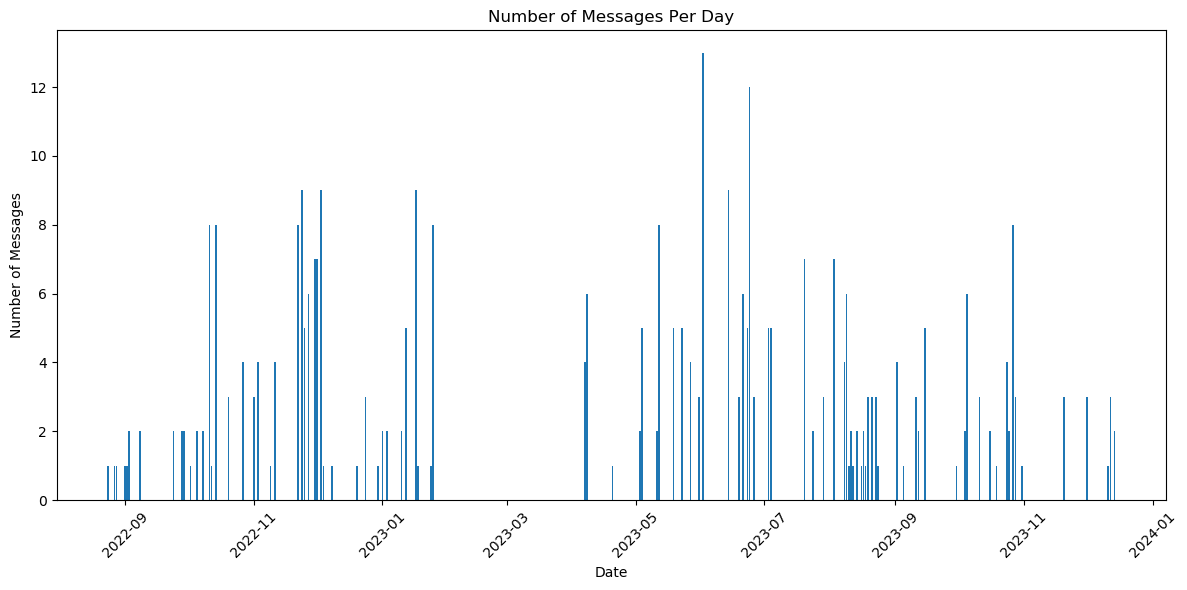

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

# Count the number of messages for each day
messages_per_day = df['Date'].dt.date.value_counts().sort_index()

# Convert to DataFrame
messages_per_day_df = messages_per_day.reset_index()
messages_per_day_df.columns = ['Date', 'Number of Messages']

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(messages_per_day_df['Date'], messages_per_day_df['Number of Messages'])
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.title('Number of Messages Per Day')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()
